In [60]:
import pandas as pd
import cv2
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [2]:


data_dir = "E:/alzheimerproject/mridata/"
disease_conditions = os.listdir(data_dir)
image_data = []

for condition in disease_conditions:
    condition_path = os.path.join(data_dir, condition)
    images = os.listdir(condition_path)
    for image_name in images:
        image_path = os.path.join(condition_path, image_name)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read as grayscale
        if image is not None:
            image_data.append((image, condition))
        else:
            print(f"Failed to read image: {image_path}")

# Now, you have grayscale image data and corresponding disease condition labels.


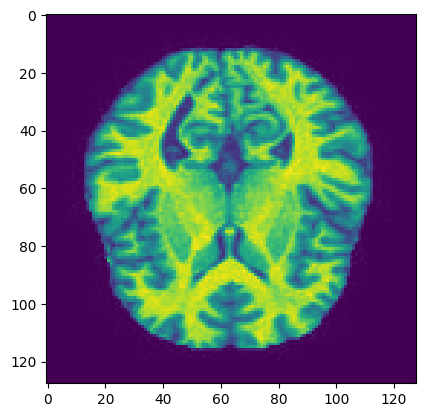

In [3]:
from matplotlib import pyplot as plt
plt.imshow(image_data[1654][0], interpolation='nearest')
image_height, image_width = image_data[1654][0].shape[0], image_data[1654][0].shape[1]
plt.show()

In [4]:
print(image_height, image_width)

128 128


In [5]:
print("Total images" ,len(image_data))

Total images 6400


In [6]:
X, y = zip(*image_data)
X = np.array(X)  # Convert image data to a NumPy array
y = np.array(y)


In [7]:
# Example mapping of class labels to numeric labels
class_mapping = {
    'Mild_Demented': 0,
    'Moderate_Demented': 1,
    'Non_Demented': 2,
    'Very_Mild_Demented': 3
}

# Convert class labels in y_test to numeric labels
y_numeric= [class_mapping[label] for label in y]


In [8]:
y=y_numeric

In [9]:
# Convert y_test (list) to a NumPy array
y = np.array(y)



In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Normalize pixel values to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0


In [12]:
num_classes = 4

In [13]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width,1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

In [14]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [15]:

# Train the model with the training data
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))



Epoch 1/10
160/160 [==============================] - 120s 738ms/step - loss: 1.0050 - accuracy: 0.5234 - val_loss: 0.8635 - val_accuracy: 0.5836
Epoch 2/10
160/160 [==============================] - 113s 704ms/step - loss: 0.7361 - accuracy: 0.6752 - val_loss: 0.6290 - val_accuracy: 0.7148
Epoch 3/10
160/160 [==============================] - 80s 501ms/step - loss: 0.3769 - accuracy: 0.8537 - val_loss: 0.3774 - val_accuracy: 0.8586
Epoch 4/10
160/160 [==============================] - 74s 462ms/step - loss: 0.1543 - accuracy: 0.9496 - val_loss: 0.1490 - val_accuracy: 0.9492
Epoch 5/10
160/160 [==============================] - 71s 445ms/step - loss: 0.0494 - accuracy: 0.9885 - val_loss: 0.0756 - val_accuracy: 0.9766
Epoch 6/10
160/160 [==============================] - 69s 433ms/step - loss: 0.0108 - accuracy: 0.9990 - val_loss: 0.0791 - val_accuracy: 0.9734
Epoch 7/10
160/160 [==============================] - 69s 434ms/step - loss: 0.0063 - accuracy: 0.9996 - val_loss: 0.0405 - val_

In [16]:
# Evaluate the model's performance on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)



40/40 [==============================] - 4s 102ms/step - loss: 0.0336 - accuracy: 0.9898


In [17]:
# Print the test accuracy
print(f"Test accuracy: {test_accuracy}")

Test accuracy: 0.9898437261581421


In [18]:

# Save the trained model to an HDF5 file
model.save('mri_trained_model.h5')

print("Model saved as 'mri_trained_model.h5'")


C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved as 'mri_trained_model.h5'


In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [105]:
dnn_with_conv_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')
])


In [106]:
dnn_with_conv_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [107]:
dnn_with_conv_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))



Epoch 1/10
160/160 [==============================] - 69s 426ms/step - loss: 6.7215 - accuracy: 0.5137 - val_loss: 0.9390 - val_accuracy: 0.5383
Epoch 2/10
160/160 [==============================] - 72s 451ms/step - loss: 0.8103 - accuracy: 0.6273 - val_loss: 0.7098 - val_accuracy: 0.6844
Epoch 3/10
160/160 [==============================] - 69s 432ms/step - loss: 0.5739 - accuracy: 0.7580 - val_loss: 0.6393 - val_accuracy: 0.7203
Epoch 4/10
160/160 [==============================] - 70s 441ms/step - loss: 0.4258 - accuracy: 0.8270 - val_loss: 0.4763 - val_accuracy: 0.8031
Epoch 5/10
160/160 [==============================] - 72s 452ms/step - loss: 0.2915 - accuracy: 0.8869 - val_loss: 0.4774 - val_accuracy: 0.8094
Epoch 6/10
160/160 [==============================] - 69s 434ms/step - loss: 0.1769 - accuracy: 0.9324 - val_loss: 0.3439 - val_accuracy: 0.8703
Epoch 7/10
160/160 [==============================] - 70s 439ms/step - loss: 0.0931 - accuracy: 0.9686 - val_loss: 0.2883 - val_ac

In [108]:
# Evaluate the accuracy on the validation set
loss, accuracy = dnn_with_conv_model.evaluate(X_test, y_test)



40/40 [==============================] - 4s 100ms/step - loss: 0.3109 - accuracy: 0.9078


In [109]:
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

Validation Accuracy: 90.78%


In [110]:

# Save the DNN model
dnn_with_conv_mode.save('dnn_model.h5')